In [ ]:
%config IPCompleter.greedy=True

In [89]:
import sys
import os
import pandas as pd
sys.path.append("..") # relative path to module toolkit

In [77]:
#from keras.applications import ResNet50
#from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras_preprocessing.image import ImageDataGenerator
from toolkit import getLabelsFromDir, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# setup
batch_size = 3
val_dir = "../../images/images_genus/val/"
val_images = 30
datasetDir = "images_genus/"
saved_model = 'restnet50frozen.h5'
results_file = "results.csv"

In [111]:
labels = getLabelsFromDir(val_dir)
val_datagen = ImageDataGenerator(rescale=1./255.)
validation_steps = int(val_images/batch_size) + 1

In [79]:
model = load_model(saved_model)

In [80]:
val_generator = val_datagen.flow_from_directory(val_dir,
                                                    classes=labels,
                                                    class_mode="categorical",
                                                    batch_size=batch_size,
                                                    color_mode='rgb',
                                                    target_size=(224, 224),
                                                    shuffle=False,
                                                    seed=1)

Found 3454 images belonging to 44 classes.


In [82]:
Y_pred = model.predict_generator(val_generator, steps=validation_steps, verbose=1)

11/11 [==============================] - 29s    


In [83]:
y_pred = np.argmax(Y_pred, axis=1)
y_pred3 = [y[-3:] for y in np.argsort(Y_pred, axis=1)] 

In [86]:
#print(classification_report(val_generator.classes, y_pred, target_names=labels))
print(classification_report(val_generator.classes[:33], y_pred, target_names=labels))

              precision    recall  f1-score   support

      Othius       0.00      0.00      0.00        33
 Xantholinus       0.00      0.00      0.00         0

 avg / total       0.00      0.00      0.00        33



/home/tofa/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 44
  .format(len(labels), len(target_names))
/home/tofa/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tofa/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion matrix, without normalization
[[ 0 33]
 [ 0  0]]


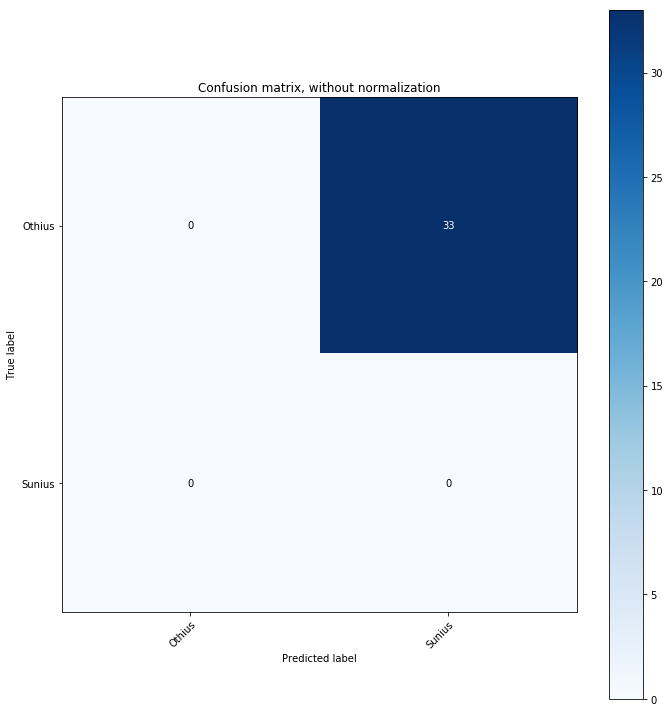

In [88]:
y_true = val_generator.classes
matplotlib.rcParams['figure.figsize'] = [10, 10]
plot_confusion_matrix(y_true, y_pred, np.array(labels))

In [94]:
labels = (val_generator.class_indices) # dict of label:index
labels = dict((i,l) for l,i in labels.items()) # dict of index:label

In [112]:
# create pd.dataframe and save predictions to .csv
filenames=[datasetDir + name for name in val_generator.filenames]
y_pred_labels = [labels[y] for y in y_pred]
y_pred3_labels = []
for i,top3 in enumerate(y_pred3):
    l = []
    for top in top3:
        l.append((labels[top], Y_pred[i][top]))
    y_pred3_labels.append(l)

results=pd.DataFrame({"Filename":filenames,
                      "Prediction1":y_pred_labels,
                      "Prediction3":y_pred3_labels})
results.to_csv(results_file,index=True)

['images_genus/Othius/Othius angustus_10.jpg',
 'images_genus/Othius/Othius angustus_11.jpg',
 'images_genus/Othius/Othius angustus_12.jpg',
 'images_genus/Othius/Othius angustus_13.jpg',
 'images_genus/Othius/Othius angustus_14.jpg',
 'images_genus/Othius/Othius angustus_15.jpg',
 'images_genus/Othius/Othius angustus_16.jpg',
 'images_genus/Othius/Othius angustus_17.jpg',
 'images_genus/Othius/Othius angustus_18.jpg',
 'images_genus/Othius/Othius angustus_19.jpg',
 'images_genus/Othius/Othius angustus_20.jpg',
 'images_genus/Othius/Othius angustus_21.jpg',
 'images_genus/Othius/Othius angustus_22.jpg',
 'images_genus/Othius/Othius angustus_23.jpg',
 'images_genus/Othius/Othius angustus_24.jpg',
 'images_genus/Othius/Othius angustus_25.jpg',
 'images_genus/Othius/Othius angustus_26.jpg',
 'images_genus/Othius/Othius angustus_9.jpg',
 'images_genus/Othius/Othius punctulatus_10.jpg',
 'images_genus/Othius/Othius punctulatus_11.jpg',
 'images_genus/Othius/Othius punctulatus_12.jpg',
 'ima